<h1>Problem Definition & Objectives</h1>

<h2>Objectives</h2>
<ul>
    <li>Build a trading algorithm using the SSL Indicator combined with a volume and momentum indicator</li>
    <li>Backtest the strategy on historical stock data and compare its performance with the S&P 500</li>
</ul>
<h2>Key Goals</h2>
<ul>
    <li>Develop a trading startegy that balances return and risk.</li>
    <li>Ensure the startegy is scalable, modular, and adheres to industry standards.</li>
</ul>

In [17]:
import yfinance as yf
import pandas as pd

# Fetch historical data for NVidia or SPY (S&P500 ETF)
data = yf.download('NVDA', start='2010-01-01', end='2024-09-09')

[*********************100%***********************]  1 of 1 completed


In [18]:
data.columns = data.columns.str.lower()

In [28]:
# Implement the SSL Semaphore Indicator for generating buy / sell signals
import talib
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

def calculate_moving_averages(df, high_col='high', low_col='low', period=10):
    """
    Calculate the moving averages for the high and low prices.

    Parameters:
    df (pd.DataFrame): DataFrame containing stock data
    high_col (str): Column name for high prices
    low_col (str): Column name for low prices
    period (int): Period for calculating moving averages

    Returns:
    pd.DataFrame: DataFrame with 'sma_high' and 'sma_low' columns added
    """
    df['sma_high'] = talib.SMA(df[high_col], timeperiod=period)
    df['sma_low'] = talib.SMA(df[low_col], timeperiod=period)
    return df

def generate_ssl_signals(df, close_col='close', sma_high_col='sma_high', sma_low_col='sma_low'):
    """
    Generate buy and sell signals based on crossovers between the closing price
    and the moving averages applied to the high and low prices.

    Parameters:
    df (pd.DataFrame): DataFrame containing stock data
    close_col (str): Column name for close prices
    sma_high_col (str): Column name for the high-based moving average
    sma_low_col (str): Column name for the low-based moving average

    Returns:
    pd.DataFrame: DataFrame with 'buy_signal' and 'sell_signal' columns added
    """
    df.loc[:,'buy_signal'] = np.where(df[close_col] > df[sma_high_col], 1, 0)
    df.loc[:,'sell_signal'] = np.where(df[close_col] < df[sma_low_col], -1, 0)
    return df

def plot_ssl_signals(df, close_col='close', sma_high_col='sma_high', sma_low_col='sma_low', buy_signal_col='buy_signal', sell_signal_col='sell_signal'):
    """
    Plot the SSL semaphore signals along with the stock price and moving averages.

    Parameters:
    df (pd.DataFrame): DataFrame containing stock data
    close_col (str): Column name for close prices
    sma_high_col (str): Column name for the high-based moving average
    sma_low_col (str): Column name for the low-based moving average
    buy_signal_col (str): Column name for buy signals
    sell_signal_col (str): Column name for sell signals
    """
    fig = go.Figure()

    # Add close price line
    fig.add_trace(go.Scatter(x=df.index, y=df[close_col], mode='lines', name='Close Price', line=dict(color='black')))
    
    # Add SMA lines
    fig.add_trace(go.Scatter(x=df.index, y=df[sma_high_col], mode='lines', name='SMA High', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=df.index, y=df[sma_low_col], mode='lines', name='SMA Low', line=dict(color='red')))
    
    # Add buy and sell signals
    fig.add_trace(go.Scatter(x=df.index, y=df[buy_signal_col] * df[close_col], mode='markers', name='Buy Signal', marker=dict(symbol='triangle-up', color='blue', size=10)))
    fig.add_trace(go.Scatter(x=df.index, y=df[sell_signal_col] * df[close_col], mode='markers', name='Sell Signal', marker=dict(symbol='triangle-down', color='red', size=10)))

    # Update layout for better readability
    fig.update_layout(title='SSL Semaphore Signal Level',
                      xaxis_title='Time',
                      yaxis_title='Price',
                      template='plotly_white')

    # Show interactive plot
    fig.show()




/var/folders/hk/gs1pv6xn3pgb85r7g20122300000gn/T/ipykernel_15094/1506862152.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'buy_signal'] = np.where(df[close_col] > df[sma_high_col], 1, 0)
/var/folders/hk/gs1pv6xn3pgb85r7g20122300000gn/T/ipykernel_15094/1506862152.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'sell_signal'] = np.where(df[close_col] < df[sma_low_col], -1, 0)


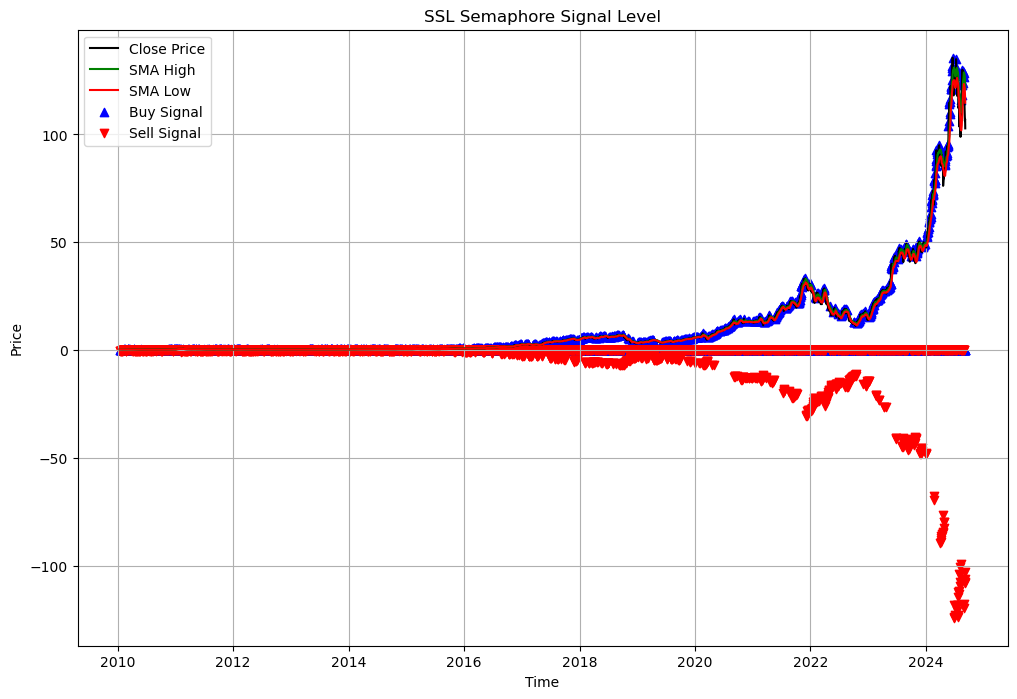

In [26]:
df = calculate_moving_averages(data)

df_cleaned = df.dropna()
df_cleaned

df_cleaned = generate_ssl_signals(df_cleaned)

plot_ssl_signals(df_cleaned)

In [23]:
# Volume Indicator (On-Balance Volume - OBV)
df_cleaned.loc[:, 'obv'] = talib.OBV(df_cleaned['close'], df_cleaned['volume'])

# Momentum Indicators (RSI and MACD)
df_cleaned.loc[:, 'rsi'] = talib.RSI(df_cleaned['close'], timeperiod=14)

# Assign MACD, signal, and histogram
df_cleaned.loc[:, 'macd'], df_cleaned.loc[:, 'macdsignal'], df_cleaned.loc[:, 'macdhist'] = talib.MACD(df_cleaned['close'], fastperiod=12, slowperiod=26, signalperiod=9)

df_cleaned = df_cleaned.dropna()
df_cleaned

/var/folders/hk/gs1pv6xn3pgb85r7g20122300000gn/T/ipykernel_15094/1509487814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'obv'] = talib.OBV(df_cleaned['close'], df_cleaned['volume'])
/var/folders/hk/gs1pv6xn3pgb85r7g20122300000gn/T/ipykernel_15094/1509487814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'rsi'] = talib.RSI(df_cleaned['close'], timeperiod=14)
/var/folders/hk/gs1pv6xn3pgb85r7g20122300000gn/T/ipykernel_15094/1509487814.py:8: SettingWithCopyWarnin

,open,high,low,close,adj close,volume,sma_high,sma_low,buy_signal,sell_signal,obv,rsi,macd,macdsignal,macdhist
Date,,,,,,,,,,,,,,,
2010-04-22,0.408250,0.418000,0.402500,0.416750,0.382254,656932000,0.434800,0.422000,0,-1,2.713448e+09,42.560360,-0.003586,-0.001165,-0.002420
2010-04-23,0.415500,0.416500,0.403750,0.411000,0.376980,752916000,0.433825,0.420500,0,-1,1.960532e+09,39.935098,-0.004689,-0.001870,-0.002819
2010-04-26,0.411500,0.420000,0.410750,0.415000,0.380649,491092000,0.432400,0.419125,0,-1,2.451624e+09,42.588136,-0.005181,-0.002532,-0.002649
2010-04-27,0.412000,0.416250,0.402000,0.403250,0.369872,606704000,0.429725,0.416075,0,-1,1.844920e+09,37.366892,-0.006445,-0.003315,-0.003130
2010-04-28,0.403000,0.409750,0.395750,0.404000,0.370560,672164000,0.425375,0.411650,0,-1,2.517084e+09,37.890320,-0.007301,-0.004112,-0.003189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,119.529999,121.750000,117.220001,119.370003,119.370003,333751600,128.455001,122.911000,0,-1,1.076249e+11,49.295456,2.114156,2.103284,0.010873
2024-09-03,116.010002,116.209999,107.290001,108.000000,108.000000,477155100,127.076001,121.298000,0,-1,1.071478e+11,40.316209,0.816717,1.845970,-1.029253
2024-09-04,105.410004,113.269997,104.120003,106.209999,106.209999,372470300,125.415000,119.121001,0,-1,1.067753e+11,39.108448,-0.351895,1.406397,-1.758292


In [25]:
# Strategy Implementation
# Signals SSL, Volume, and Momentum
# Define rules for buying, selling, and holding

def generate_trading_signals(df):
    
    # Conditions for buying
    df.loc[:, 'buy'] = np.where((df['buy_signal'] == 1) & (df['rsi'] < 30) & (df['macd'] > df['macdsignal']), 1, 0)
    
    # Conditions for selling
    df.loc[:, 'sell'] = np.where((df['sell_signal'] == -1) & (df['rsi'] > 70) & (df['macd'] < df['macdsignal']), -1, 0)
    
    return df


df_cleaned = generate_trading_signals(df_cleaned)
df_cleaned

,open,high,low,close,adj close,volume,sma_high,sma_low,buy_signal,sell_signal,obv,rsi,macd,macdsignal,macdhist,buy,sell
Date,,,,,,,,,,,,,,,,,
2010-04-22,0.408250,0.418000,0.402500,0.416750,0.382254,656932000,0.434800,0.422000,0,-1,2.713448e+09,42.560360,-0.003586,-0.001165,-0.002420,0,0
2010-04-23,0.415500,0.416500,0.403750,0.411000,0.376980,752916000,0.433825,0.420500,0,-1,1.960532e+09,39.935098,-0.004689,-0.001870,-0.002819,0,0
2010-04-26,0.411500,0.420000,0.410750,0.415000,0.380649,491092000,0.432400,0.419125,0,-1,2.451624e+09,42.588136,-0.005181,-0.002532,-0.002649,0,0
2010-04-27,0.412000,0.416250,0.402000,0.403250,0.369872,606704000,0.429725,0.416075,0,-1,1.844920e+09,37.366892,-0.006445,-0.003315,-0.003130,0,0
2010-04-28,0.403000,0.409750,0.395750,0.404000,0.370560,672164000,0.425375,0.411650,0,-1,2.517084e+09,37.890320,-0.007301,-0.004112,-0.003189,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,119.529999,121.750000,117.220001,119.370003,119.370003,333751600,128.455001,122.911000,0,-1,1.076249e+11,49.295456,2.114156,2.103284,0.010873,0,0
2024-09-03,116.010002,116.209999,107.290001,108.000000,108.000000,477155100,127.076001,121.298000,0,-1,1.071478e+11,40.316209,0.816717,1.845970,-1.029253,0,0
2024-09-04,105.410004,113.269997,104.120003,106.209999,106.209999,372470300,125.415000,119.121001,0,-1,1.067753e+11,39.108448,-0.351895,1.406397,-1.758292,0,0
